In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import coo_matrix

In [3]:
df = pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [4]:
df = df[['Uniq Id','Product Id','Product Category', 'Product Brand', 'Product Name',
       'Product Price','Product Image Url','Product Description', 'Product Rating', 'Product Reviews Count','Product Tags']]

In [5]:
df.head()

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Image Url,Product Description,Product Rating,Product Reviews Count,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,NaN,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,NaN,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,4.5,29221.0,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,NaN,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...",NaN,131.0,"Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [6]:
df['Product Tags']

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                    Foundation, Wal-mart, Walmart.com
Name: Product Tags, Length: 5000, dtype: object

In [7]:
df.shape

(5000, 11)

In [8]:
df.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Category           10
Product Brand              13
Product Name                0
Product Price              42
Product Image Url           0
Product Description      1127
Product Rating           2806
Product Reviews Count    1654
Product Tags                0
dtype: int64

In [9]:
df['Product Brand'] = df['Product Brand'].fillna(0) 
df['Product Category'] = df['Product Category'].fillna(0) 
df['Product Price'] = df['Product Price'].fillna(0) 
df['Product Description'] = df['Product Description'].fillna(0) 
df['Product Rating'] = df['Product Rating'].fillna(0) 
df['Product Reviews Count'] = df['Product Reviews Count'].fillna(0) 

In [10]:
df.isnull().sum()

Uniq Id                  0
Product Id               0
Product Category         0
Product Brand            0
Product Name             0
Product Price            0
Product Image Url        0
Product Description      0
Product Rating           0
Product Reviews Count    0
Product Tags             0
dtype: int64

In [11]:
updated_column_names = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
df.rename(columns = updated_column_names, inplace=True)

In [12]:
df.head(2)

,ID,ProdID,Category,Brand,Name,Product Price,ImageURL,Description,Rating,ReviewCount,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0,0.0,0.0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,0.0,0.0,"Nice 'n Easy Permanent Color, 111 Natural Medi..."


In [13]:
df['ID'] = df['ID'].str.extract(r'(\d+)').astype(float)
df['ProdID'] = df['ProdID'].str.extract(r'(\d+)').astype(float)

In [14]:
df[['ID','ProdID']]

,ID,ProdID
0,1.705737e+09,2.0
1,9.500000e+01,76.0
2,8.000000e+00,8.0
3,4.000000e+00,3.0
4,9.900000e+02,3.0
...,...,...
4995,2.771000e+03,208.0
4996,0.000000e+00,1.0
4997,3.400000e+01,96.0
4998,9.000000e+00,7.0


In [15]:
users = df['ID'].nunique()
items = df['ProdID'].nunique()
ratings = df['Rating'].nunique()
print(f"Total unique users: {users}")
print(f"Total unique items: {items}")
print(f"Total unique ratings: {ratings}")

Total unique users: 1721
Total unique items: 1697
Total unique ratings: 36


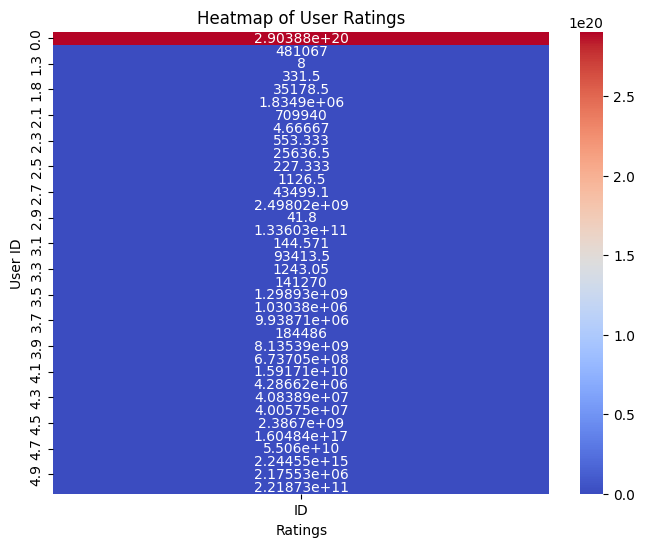

In [16]:
data = df.pivot_table('ID', 'Rating')

plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

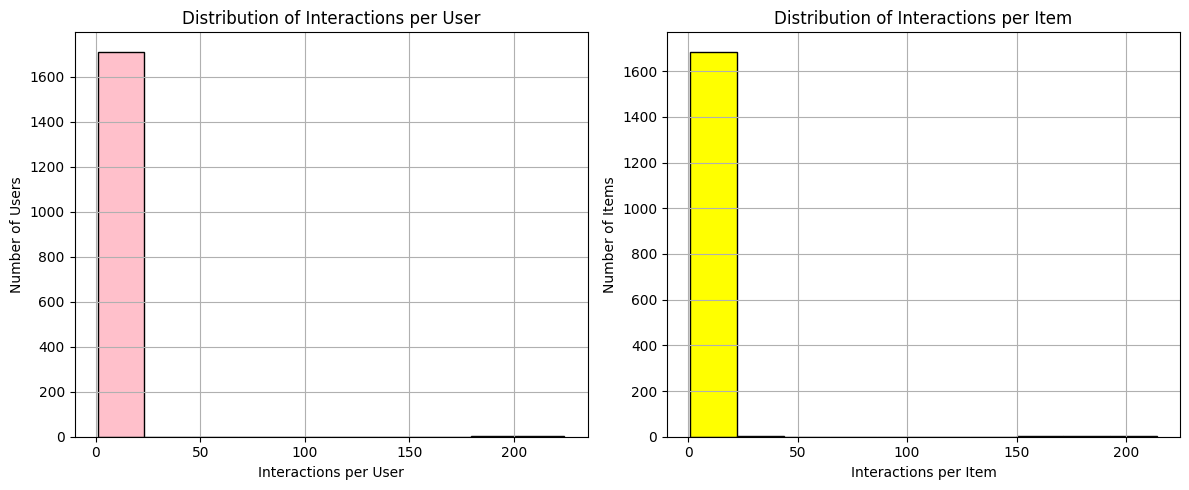

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['ID'].value_counts().hist(bins=10, edgecolor='k',color='pink')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
df['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='yellow')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular Products')

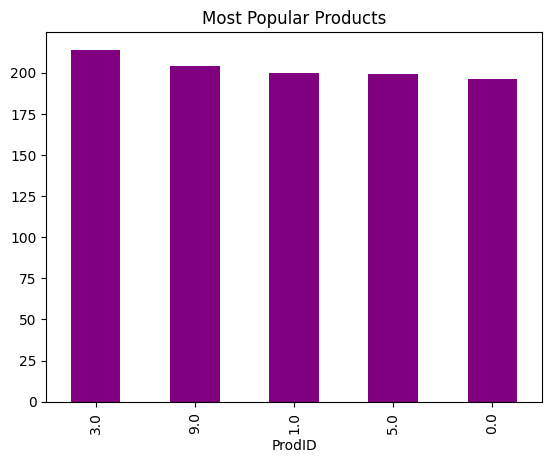

In [18]:
popular_prod = df['ProdID'].value_counts().head(5)
popular_prod.plot(kind='bar',color='purple')
plt.title("Most Popular Products")


<Axes: xlabel='Rating'>

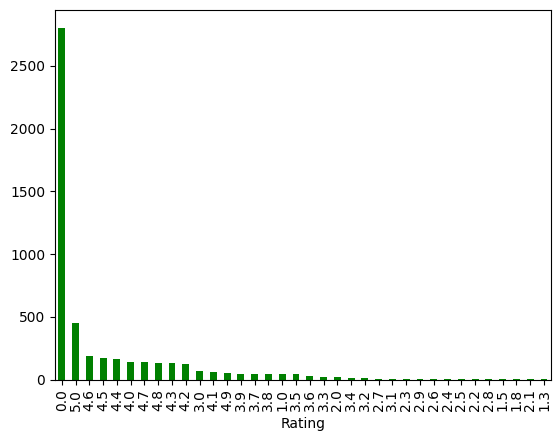

In [19]:
df['Rating'].value_counts().plot(kind='bar',color='green')

In [20]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")

In [21]:
def clean_extract_tags(text):
    if not isinstance(text, str):
        text = str(text)
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract = ['Category', 'Brand', 'Description']

for column in columns_to_extract:
    df[column] = df[column].apply(clean_extract_tags)

In [22]:
df['Tags'] = df[columns_to_extract].apply(lambda row: ', '.join(row), axis=1)


In [23]:
df.head(2)

,ID,ProdID,Category,Brand,Name,Product Price,ImageURL,Description,Rating,ReviewCount,Tags
0,1.705737e+09,2.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...",0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,..."


In [24]:
avg = df.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()
rating_sorted = avg.sort_values(by = 'Rating', ascending=False)
rating_recomm = rating_sorted.head(10)
rating_recomm

,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4.0,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5.0
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2.0,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5.0
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2.0,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5.0
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24.0,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5.0
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2.0,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5.0
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1.0,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5.0
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1.0,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5.0
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4.0,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5.0
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12.0,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5.0
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1.0,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5.0


In [25]:
rating_recomm['Rating'] = rating_recomm['Rating'].astype(int)
rating_recomm['ReviewCount'] = rating_recomm['ReviewCount'].astype(int)

C:\Users\nandi\AppData\Local\Temp\ipykernel_13764\3904040648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_recomm['Rating'] = rating_recomm['Rating'].astype(int)
C:\Users\nandi\AppData\Local\Temp\ipykernel_13764\3904040648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_recomm['ReviewCount'] = rating_recomm['ReviewCount'].astype(int)


In [26]:
rating_recomm

,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


In [27]:
print("Rating Recommendation System for Trending Products:")
rating_recomm[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_recomm[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_recomm

Rating Recommendation System for Trending Products:


C:\Users\nandi\AppData\Local\Temp\ipykernel_13764\2807302433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_recomm[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_recomm[['Name','Rating','ReviewCount','Brand','ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


In [28]:
df.head(1)

,ID,ProdID,Category,Brand,Name,Product Price,ImageURL,Description,Rating,ReviewCount,Tags
0,1.705737e+09,2.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai..."


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tags'])
cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [30]:
cosine_similarities

array([[1.        , 0.00347577, 0.00363226, ..., 0.13535785, 0.31726435,
        0.05689108],
       [0.00347577, 1.        , 0.38086046, ..., 0.02315363, 0.00183907,
        0.0381051 ],
       [0.00363226, 0.38086046, 1.        , ..., 0.03960089, 0.00192187,
        0.0591094 ],
       ...,
       [0.13535785, 0.02315363, 0.03960089, ..., 1.        , 0.00123005,
        0.0379399 ],
       [0.31726435, 0.00183907, 0.00192187, ..., 0.00123005, 1.        ,
        0.00544407],
       [0.05689108, 0.0381051 , 0.0591094 , ..., 0.0379399 , 0.00544407,
        1.        ]])

In [31]:
prod_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
prod_index = df[df['Name']==prod_name].index[0]
similar_prod = list(enumerate(cosine_similarities[prod_index]))

In [32]:
similar_prod = sorted(similar_prod, key=lambda x:x[1], reverse=True)
top_similar_prod = similar_prod[1:10]

recomm_prod_indics = [x[0] for x in top_similar_prod]

In [33]:
df.iloc[recomm_prod_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(df, prod_name, top_n=10):

    if prod_name not in df['Name'].values:
        print(f"Item '{prod_name}' not found in the training data.")
        return pd.DataFrame()

    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tags'])
    cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

    prod_index = df[df['Name'] == prod_name].index[0]

    similar_prod = list(enumerate(cosine_similarities[prod_index]))

    similar_prod = sorted(similar_prod, key=lambda x: x[1], reverse=True)

    top_similar_prod = similar_prod[1:top_n+1]

    recomm_prod_indices = [x[0] for x in top_similar_prod]

    recomm_prod_details = df.iloc[recomm_prod_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recomm_prod_details

In [35]:
prod_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(df, prod_name, top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [36]:
prod_name = 'Colgate My First Baby and Toddler Toothpaste, Fluoride Free and SLS Free, 1.75 Oz'
content_based_rec = content_based_recommendations(df, prod_name, top_n=8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
1449,Colgate Kids Toothpaste with Anticavity Fluori...,37.0,colgate,https://i5.walmartimages.com/asr/38951b29-3178...,4.5
3980,Toms of Maine 683377 Toddler Fluoride-Free Nat...,36.0,"tom, maine",https://i5.walmartimages.com/asr/3b8f1249-f6bf...,4.4
4602,3 Pack - Orajel Toddler Training Toothpaste Fr...,13.0,orajel,https://i5.walmartimages.com/asr/17c9ce4e-77d4...,4.7
4827,"Colgate Kids Toothbrush, Toothpaste, and Mouth...",2.0,colgate,https://i5.walmartimages.com/asr/845dcc0b-1900...,0.0
34,Crest Kids Cavity Protection Blue Bubblegum To...,51.0,crest,https://i5.walmartimages.com/asr/c8f678fd-b578...,4.7
1409,"Colgate Sensitive Toothpaste, Whitening - Fres...",201.0,colgate,https://i5.walmartimages.com/asr/5e950ef0-ce10...,0.0
2783,Stain Removal Whitening Toothpaste Fight Bleed...,5.0,tekdeals,https://i5.walmartimages.com/asr/062a674a-4a10...,3.6
3159,Colgate Cavity Protection Toothpaste with Fluo...,123.0,colgate,https://i5.walmartimages.com/asr/acd3637b-d4fc...,0.0


In [37]:
user_prod_matrix = df.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)
user_similarity = cosine_similarity(user_prod_matrix)

In [38]:
user_id = 4
user_index = user_prod_matrix.index.get_loc(user_id)

In [39]:
user_similarities = user_similarity[user_index]
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [40]:
recomm_prod = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_prod_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_prod_matrix.iloc[user_index]==0)
    
    recomm_prod.extend(user_prod_matrix.columns[not_rated_by_target_user][:10])

recomm_items_details = df[df['ProdID'].isin(recomm_prod)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]
recomm_items_details.head()

,Name,ReviewCount,Brand,ImageURL,Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,opi,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
2,Clairol Nice N Easy Permanent Color 7/106A Nat...,29221.0,clairol,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,4.5
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
4,"Gillette TRAC II Plus Razor Blade Refills, Fit...",131.0,gillette,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,0.0
7,BMC Bright and Loud Cream Gel Lacquer Polish S...,0.0,bmc,https://i5.walmartimages.com/asr/93f8bbf3-2dfd...,0.0


In [41]:
def filtering_recomm(df, user_id, top_n=10):

    user_prod_matrix = df.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)
    user_similarity = cosine_similarity(user_prod_matrix)
    user_index = user_prod_matrix.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    recomm_prod = []

    for user_index in similar_users_indices:
        rated_by_similar_user = user_prod_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_prod_matrix.iloc[user_index] == 0)
        recomm_prod.extend(user_prod_matrix.columns[not_rated_by_target_user][:top_n])
    recomm_prod_details = df[df['ProdID'].isin(recomm_prod)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recomm_prod_details.head(5)

user_id = 10
top_n = 5
filtering_rec = filtering_recomm(df, user_id)
print(f"Top {top_n} recommendations for User {user_id}:")
filtering_rec

Top 5 recommendations for User 10:


,Name,ReviewCount,Brand,ImageURL,Rating
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",0.0,opi,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0.0
2,Clairol Nice N Easy Permanent Color 7/106A Nat...,29221.0,clairol,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,4.5
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
4,"Gillette TRAC II Plus Razor Blade Refills, Fit...",131.0,gillette,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,0.0
7,BMC Bright and Loud Cream Gel Lacquer Polish S...,0.0,bmc,https://i5.walmartimages.com/asr/93f8bbf3-2dfd...,0.0


In [44]:
def hybrid_recomm(df,user_id, prod_name, top_n=10):
    content_rec = content_based_recommendations(df,prod_name, top_n)
    filtering_rec = filtering_recomm(df,user_id, top_n)
    hybrid_rec = pd.concat([content_rec, filtering_rec]).drop_duplicates()
    return hybrid_rec.head()
    
target_user_id = 10
item_name = 'Colgate My First Baby and Toddler Toothpaste, Fluoride Free and SLS Free, 1.75 Oz'
hybrid_rec = hybrid_recomm(df,user_id, prod_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Product '{prod_name}':")
hybrid_rec.

Top 10 Hybrid Recommendations for User 10 and Product 'Colgate My First Baby and Toddler Toothpaste, Fluoride Free and SLS Free, 1.75 Oz':


,Name,ReviewCount,Brand,ImageURL,Rating
1449,Colgate Kids Toothpaste with Anticavity Fluori...,37.0,colgate,https://i5.walmartimages.com/asr/38951b29-3178...,4.5
3980,Toms of Maine 683377 Toddler Fluoride-Free Nat...,36.0,"tom, maine",https://i5.walmartimages.com/asr/3b8f1249-f6bf...,4.4
4602,3 Pack - Orajel Toddler Training Toothpaste Fr...,13.0,orajel,https://i5.walmartimages.com/asr/17c9ce4e-77d4...,4.7
4827,"Colgate Kids Toothbrush, Toothpaste, and Mouth...",2.0,colgate,https://i5.walmartimages.com/asr/845dcc0b-1900...,0.0
34,Crest Kids Cavity Protection Blue Bubblegum To...,51.0,crest,https://i5.walmartimages.com/asr/c8f678fd-b578...,4.7
